In [3]:
import sys
import os

# Add the build directory to Python path
build_dir = os.path.abspath('../')
sys.path.insert(0, build_dir)

import pandas as pd
import numpy as np

import sorters
from data import list_generators

In [4]:
sorts = sorters.list_sorters()
print(sorts)

['adaptive_shivers_sort', 'cartesian_tree_sort', 'counting_sort', 'heap_sort', 'insertion_sort', 'mel_sort', 'merge_sort', 'poplar_sort', 'quick_sort', 'quick_merge_sort', 'ska_sort', 'slab_sort', 'smooth_sort', 'spin_sort', 'splay_sort', 'spread_sort', 'std_sort', 'tim_sort']


In [5]:
import data.list_generators as lg

sizes = []
for i in range (10, 100000, 10000):
    sizes.append(i)

print(sizes)

[10, 10010, 20010, 30010, 40010, 50010, 60010, 70010, 80010, 90010]


In [6]:
dataset = []
for size in sizes:
    dataset.append(lg.randomize_list(lg.generate_list(size)))

In [7]:
from tqdm import tqdm

times = []
for sort in tqdm(sorts, desc="Sorters"):
    sort_time = []
    for arr in tqdm(dataset, desc=f"Benchmarking {sort}", leave=False):
        sort_time.append(sorters.benchmark_sorter(sort, arr))
    times.append(sort_time)

print(times)

Sorters: 100%|██████████| 18/18 [00:02<00:00,  7.24it/s]

[[0.0005, 0.50925, 0.975958, 1.4715, 1.858667, 2.409458, 3.011375, 4.244, 3.925375, 4.482167], [0.004875, 0.588042, 1.103208, 1.627833, 2.471791, 3.139375, 4.095375, 4.83625, 5.469791, 6.611709], [0.000334, 0.018375, 0.034334, 0.05325, 0.072, 0.102833, 0.095083, 0.153625, 0.127041, 0.160542], [0.0005, 0.231917, 0.503459, 0.788959, 1.194334, 1.390834, 1.857584, 2.197125, 2.375083, 2.7345], [0.000375, 6.554542, 25.958125, 57.790667, 104.181, 161.857375, 236.171875, 322.59575, 423.829, 537.514333], [0.001917, 0.484125, 1.154459, 2.248709, 2.658375, 3.623917, 4.228167, 5.427125, 6.697333, 7.328333], [0.000291, 0.293208, 0.599, 0.950209, 1.33025, 1.6875, 2.041917, 2.659167, 2.932208, 3.237625], [0.016541, 0.387333, 0.818625, 1.270625, 1.797875, 2.308542, 3.230583, 4.351833, 4.381333, 5.727583], [0.00025, 0.303917, 0.685167, 1.180542, 1.526709, 1.732458, 2.175709, 2.934458, 3.29575, 3.477083], [0.000291, 0.333625, 0.699125, 1.096084, 1.604541, 2.140417, 2.713708, 2.886708, 3.397583, 3.992375

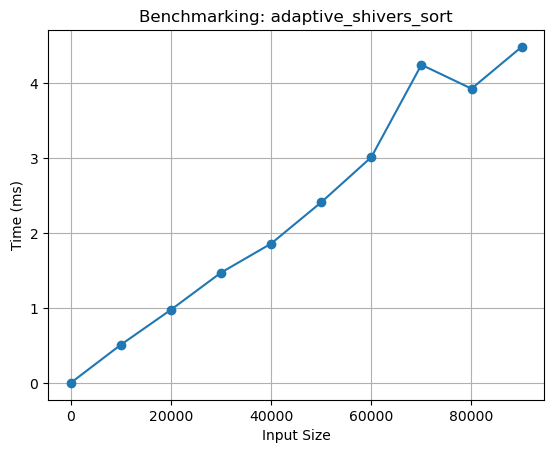

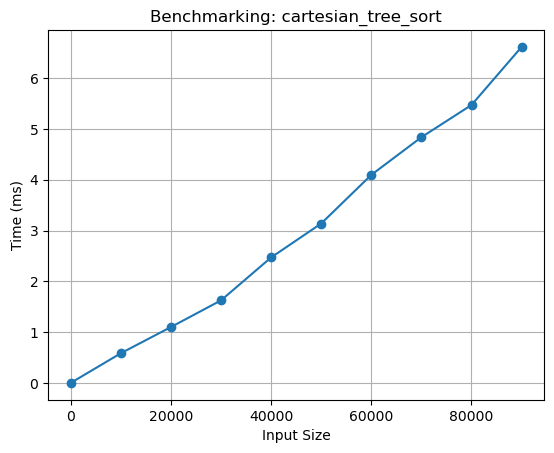

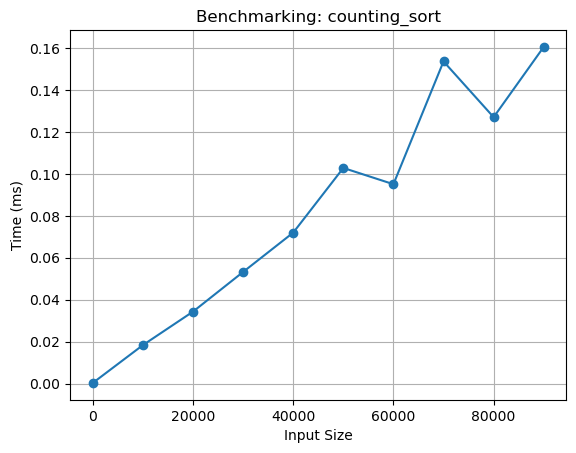

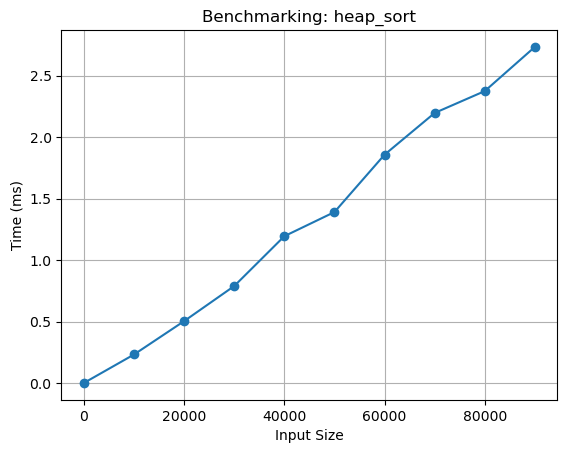

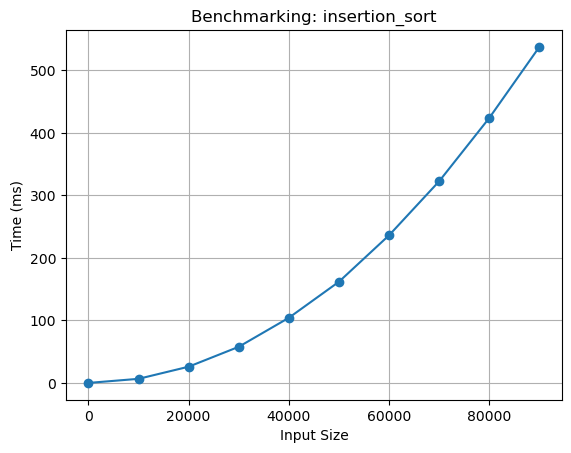

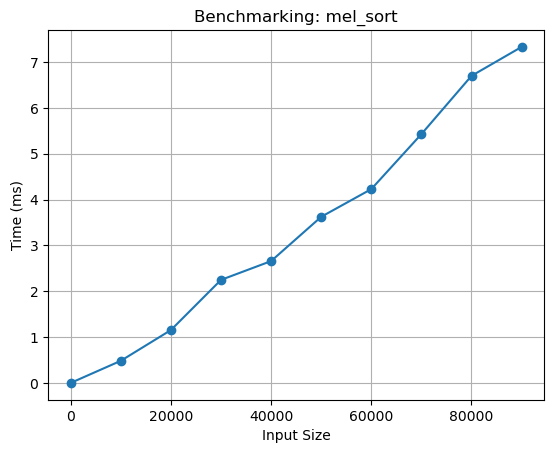

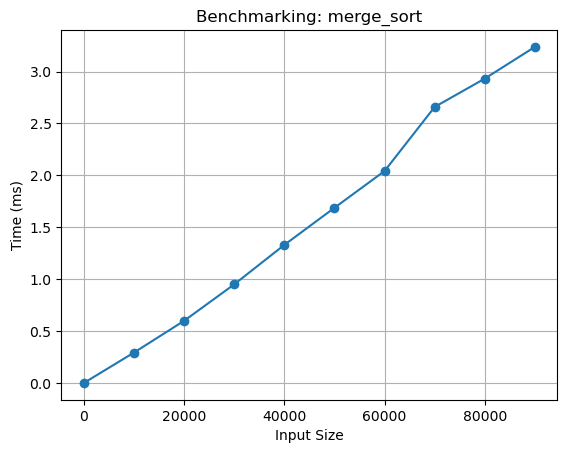

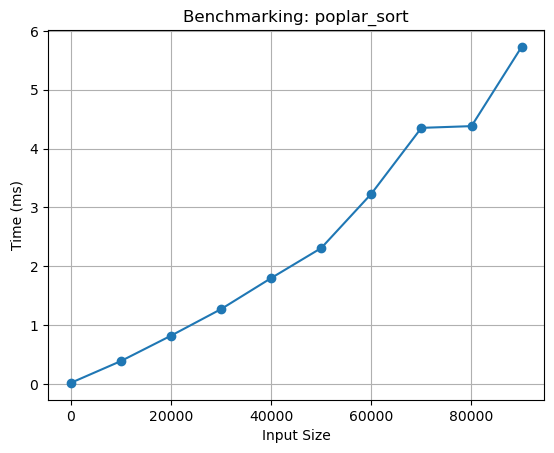

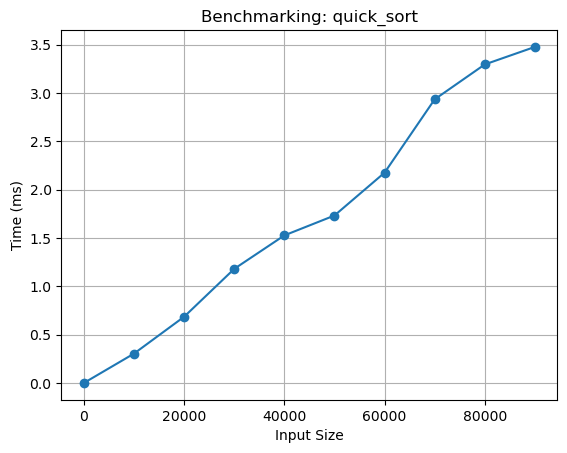

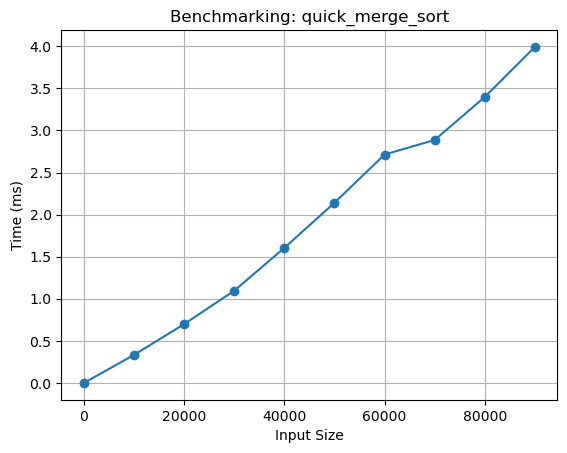

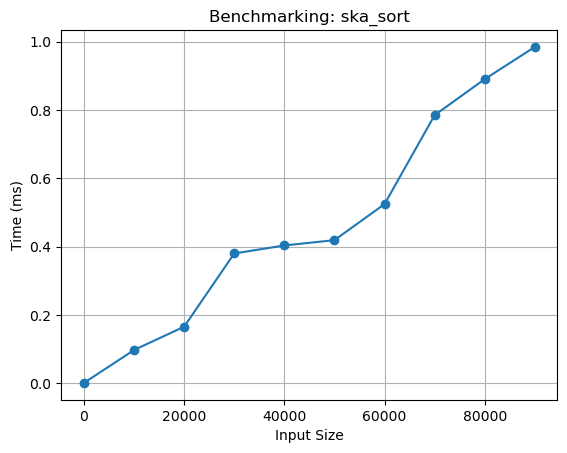

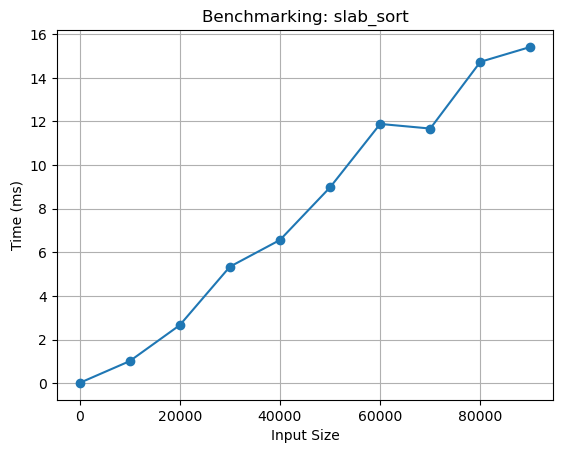

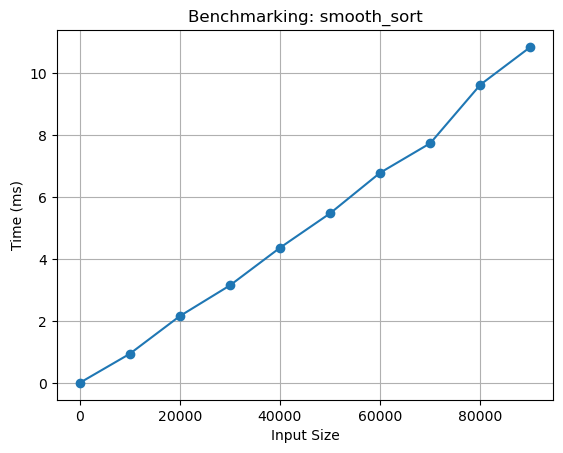

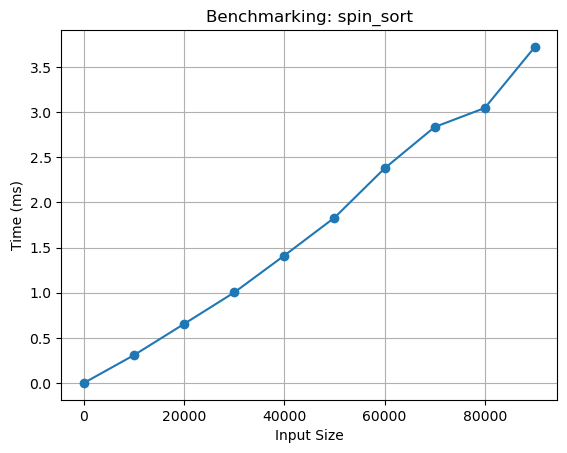

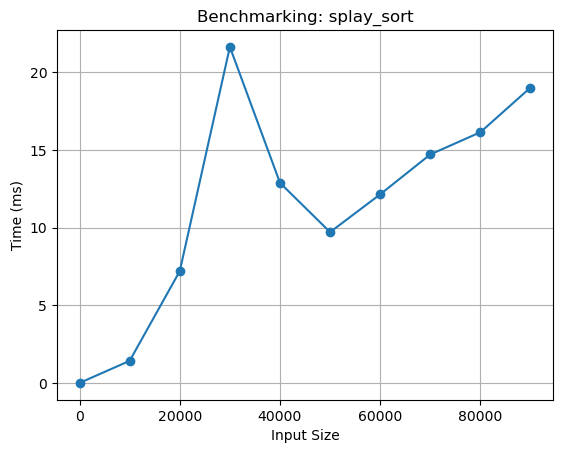

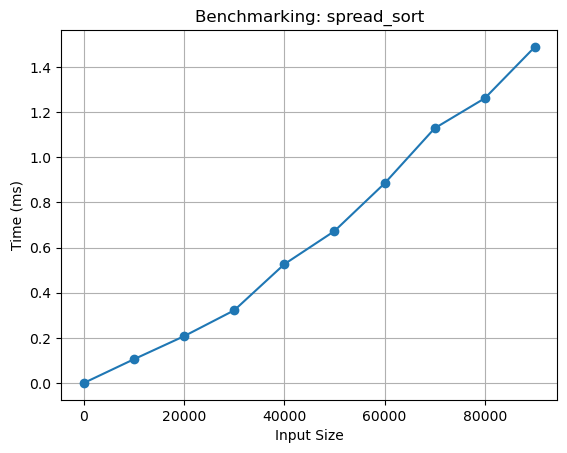

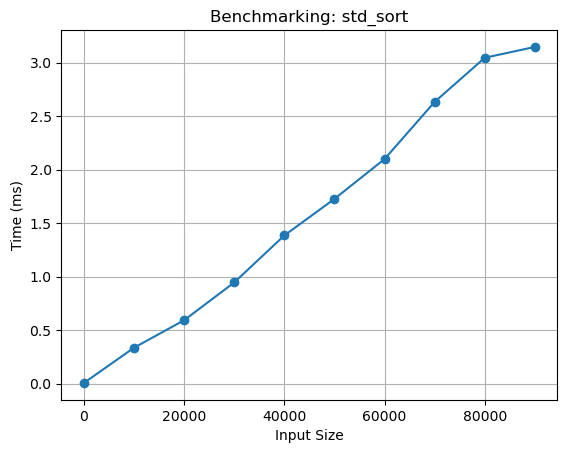

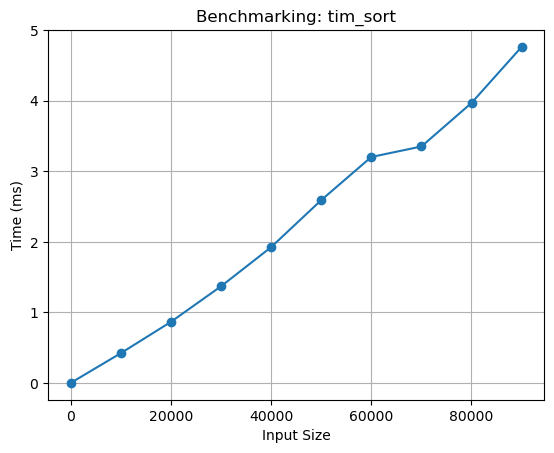

adaptive_shivers_sort: 2.2888 ms
cartesian_tree_sort: 2.9948 ms
counting_sort: 0.0817 ms
heap_sort: 1.3274 ms
insertion_sort: 187.6453 ms
mel_sort: 3.3852 ms
merge_sort: 1.5731 ms
poplar_sort: 2.4291 ms
quick_sort: 1.7312 ms
quick_merge_sort: 1.8864 ms
ska_sort: 0.4649 ms
slab_sort: 7.8300 ms
smooth_sort: 5.1051 ms
spin_sort: 1.7190 ms
splay_sort: 11.4833 ms
spread_sort: 0.6596 ms
std_sort: 1.5917 ms
tim_sort: 2.2456 ms


In [8]:
import matplotlib.pyplot as plt

for sort_name, sort_times in zip(sorts, times):
    plt.figure()  
    plt.plot(sizes, sort_times, marker='o')
    plt.xlabel("Input Size")
    plt.ylabel("Time (ms)")
    plt.title(f"Benchmarking: {sort_name}")
    plt.grid(True)
    plt.show()

for i in range(len(sorts)):
    print(f"{sorts[i]}: {np.mean(times[i]):.4f} ms")

In [9]:
import time

def benchmark_python_sort(arrays):
    total_time = 0.0
    for arr in arrays:
        arr_copy = arr.copy()

        start = time.perf_counter()
        arr_copy.sort()
        end = time.perf_counter()

        total_time += (end - start)
    return total_time * 1000

python_sort_time = benchmark_python_sort(dataset)
print(f"Python default sort benchmark: {python_sort_time:.4f} ms")

Python default sort benchmark: 86.2243 ms


In [10]:
def benchmark_numpy_sort_kind(arrays, kind='quicksort'):
    total_time = 0.0
    for arr in arrays:
        np_arr = np.array(arr)

        start = time.perf_counter()
        np.sort(np_arr, kind=kind)
        end = time.perf_counter()

        total_time += (end - start)
    return total_time * 1000  

kinds = ['quicksort', 'mergesort', 'heapsort', 'stable']

for kind in kinds:
    sort_time = benchmark_numpy_sort_kind(dataset, kind=kind)
    print(f"NumPy sort ({kind}): {sort_time:.4f} ms")

NumPy sort (quicksort): 17.8959 ms
NumPy sort (mergesort): 15.5375 ms
NumPy sort (heapsort): 14.0436 ms
NumPy sort (stable): 15.5979 ms
